In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
from google.colab import files
import cv2
from PIL import Image
import matplotlib.pyplot as plt
import urllib.request
import numpy as np

In [6]:
# Step 1: Provide the URL of the image
image_url = 'https://cdn.shopify.com/s/files/1/0274/9503/9079/files/20220211142754-margherita-9920_5a73220e-4a1a-4d33-b38f-26e98e3cd986.jpg?v=1723650067'  # Replace with the actual URL

In [7]:
# Step 2: Download the image using urllib
with urllib.request.urlopen(image_url) as response:
    img_array = np.asarray(bytearray(response.read()), dtype=np.uint8)  # Convert to NumPy array

In [8]:
# Step 3: Decode the image (convert it into OpenCV format)
img = cv2.imdecode(img_array, cv2.IMREAD_COLOR)  # Decode as a color image (BGR format)

In [9]:
# Step 4: Convert BGR to RGB for correct display
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

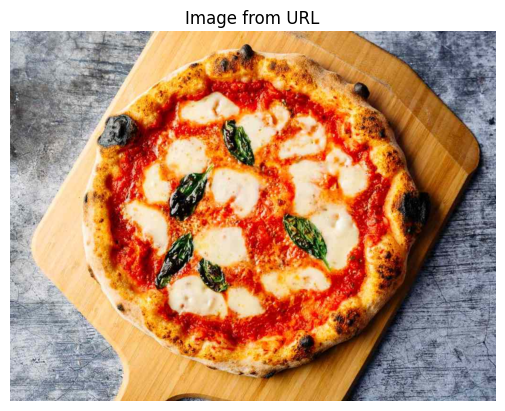

In [11]:
# Step 5: Display the image using Matplotlib
plt.imshow(img_rgb)
plt.axis('off')  # Remove axes for cleaner display
plt.title("Image from URL")
plt.show()

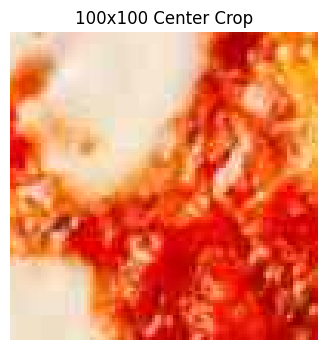

In [13]:
height = img.shape[0]
width = img.shape[1]


# Step 1: Compute center coordinates
center_x, center_y = width // 2, height // 2

# Step 2: Define crop boundaries (100x100 pixels)
start_x, end_x = center_x - 50, center_x + 50
start_y, end_y = center_y - 50, center_y + 50

# Step 3: Crop the region
center_crop = img_rgb[start_y:end_y, start_x:end_x]

# Step 4: Display the cropped region
plt.figure(figsize=(4, 4))
plt.imshow(center_crop)
plt.axis('off')  # Hide axes for clarity
plt.title("100x100 Center Crop")
plt.show()


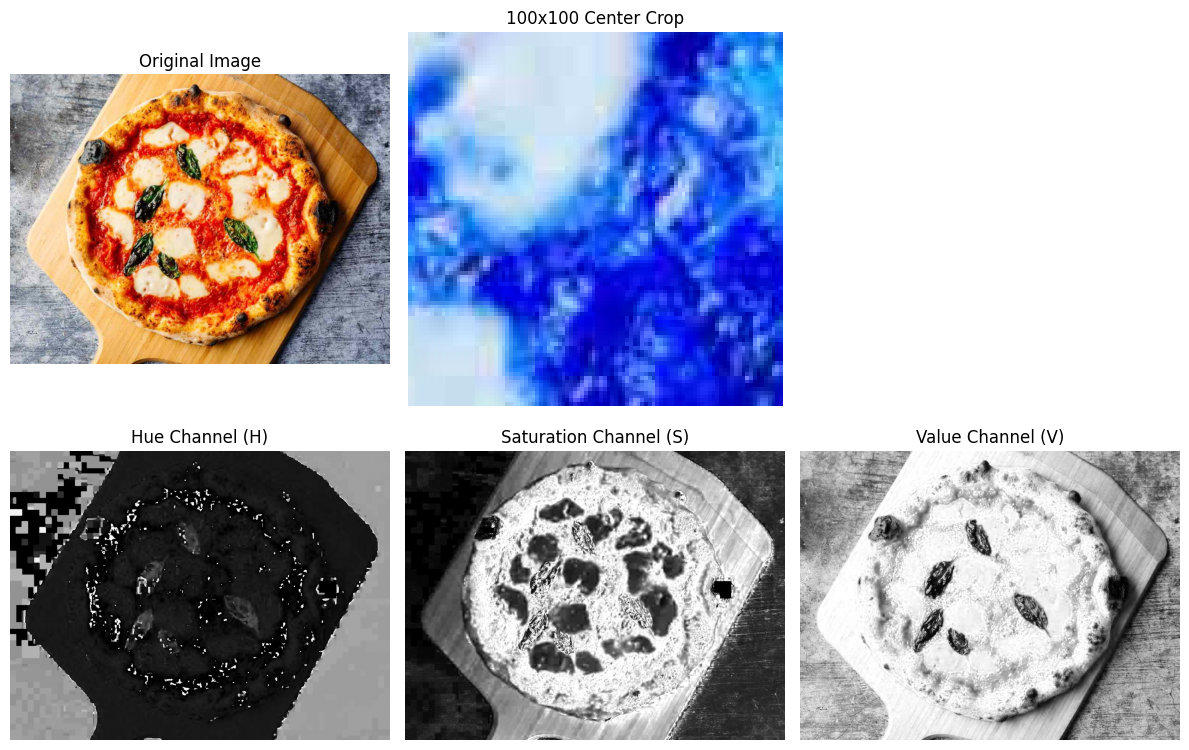

In [15]:

# Task 2: Convert to HSV and visualize components
hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
hue, sat, val = cv2.split(hsv_img)

# Display all results
plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis("off")

plt.subplot(2, 3, 2)
plt.imshow(cv2.cvtColor(center_crop, cv2.COLOR_BGR2RGB))
plt.title("100x100 Center Crop")
plt.axis("off")

plt.subplot(2, 3, 4)
plt.imshow(hue, cmap='gray')
plt.title("Hue Channel (H)")
plt.axis("off")

plt.subplot(2, 3, 5)
plt.imshow(sat, cmap='gray')
plt.title("Saturation Channel (S)")
plt.axis("off")

plt.subplot(2, 3, 6)
plt.imshow(val, cmap='gray')
plt.title("Value Channel (V)")
plt.axis("off")

plt.tight_layout()
plt.show()
